In [8]:
from pyomo.environ import *
import numpy as np
import matplotlib.pyplot as plt
import bisect
from pyomo.opt import SolverStatus, TerminationCondition

In [9]:
m1 = ConcreteModel()
m1.y = Var(bounds=(-1, 1))
m1.x1 = Var(bounds=(0, 1))
m1.x2 = Var(bounds=(0, None))
m1.c1 = Constraint(expr=m1.x2**2 == m1.y**2)
m1.c2 = Constraint(expr=m1.x2 == (m1.x1)**2)
m1.obj_expr = Expression(expr=-m1.x1)

In [10]:
def v_1(y):  
    return - np.sqrt(np.abs(y))

In [19]:
delta = 1
add_node_num=40
n_samples=5
tolerance=1e-9

solver = SolverFactory('gurobi')
solver.options['FeasibilityTol'] = 1e-9
solver.options['OptimalityTol'] = tolerance
solver.options['NonConvex'] = 2 

y_nodes = np.linspace(-delta, delta, n_samples).tolist()
new_node = 0


print("  ")
print("  ")
#print(add_node_num)

# reset bounds
m1.y.setlb(-delta)
m1.y.setub(delta)

adds=[]
mslist=[]

for k in range(add_node_num+1):
    adds.append(k)
    print('add node number ',k)
    
    if new_node not in y_nodes:
        bisect.insort(y_nodes, new_node)


    as_nodes = [v_1(y) for y in y_nodes]

    if hasattr(m1, 'As'):
        m1.del_component('As')
    if hasattr(m1, 'pw'):
        m1.del_component('pw')
    if hasattr(m1, 'obj'):
        m1.del_component('obj')
    #model_list[i].del_component('y')
    #model_list[i].y = Var(bounds=(-delta, delta))
    m1.As = Var()
    m1.pw = Piecewise(
        m1.As, m1.y,
        pw_pts=y_nodes,
        f_rule=as_nodes,
        pw_constr_type='EQ',
        pw_repn='SOS2'
    )


    
    '''
    old_expr = model_list[i].obj.expr
    model_list[i].del_component('obj')
    model_list[i].obj = Objective(expr=old_expr - model_list[i].As, sense=minimize)
    '''
    m1.obj = Objective(expr=m1.obj_expr - m1.As, sense=minimize)
    #'''
    if k == 50:
        print('  ')
        print("16start")
        results = solver.solve(m1,tee = True)
        print(y_nodes)
        aaa = y_nodes
        bbb = as_nodes
        ccc = results.problem.lower_bound
        print("16end")
        print('  ')
    #'''


    results = solver.solve(m1)
    ms_1 = results.problem.lower_bound
    new_node = value(m1.y)
    print('new node is ',new_node)
    print('ms is ',ms_1)
    print('x1 is ',value(m1.x1))
    print('x2 is ',value(m1.x2))
    print(m1.x1)
    print(' ')
    print(' ')
    mslist.append(np.log(-ms_1))


  
  
add node number  0
new node is  0.12507891615570035
ms is  -0.1767907867025013
x1 is  0.35366497728174945
x2 is  0.12507891615570035
x1
 
 
add node number  1
new node is  -0.12511837423354974
ms is  -0.17677773815248723
x1 is  0.3537207574253309
x2 is  0.12511837423354974
x1
 
 
add node number  2
new node is  -0.03125636684335061
ms is  -0.08843231206881598
x1 is  0.1767947025319215
x2 is  0.03125636684335061
x1
 
 
add node number  3
new node is  0.031262297737373955
ms is  -0.08841625047054326
x1 is  0.17681148252788279
x2 is  0.03126229983054933
x1
 
 
add node number  4
new node is  0.007829272663095563
ms is  -0.04420422733696388
x1 is  0.08848317728865507
x2 is  0.007829272663095565
x1
 
 
add node number  5
new node is  -0.007812275265522572
ms is  -0.04420028428735649
x1 is  0.08838709061433922
x2 is  0.007812277787267362
x1
 
 
add node number  6
new node is  0.28131680542870496
ms is  -0.029441092422131
x1 is  0.5303930690284143
x2 is  0.2813168072244739
x1
 
 
add no

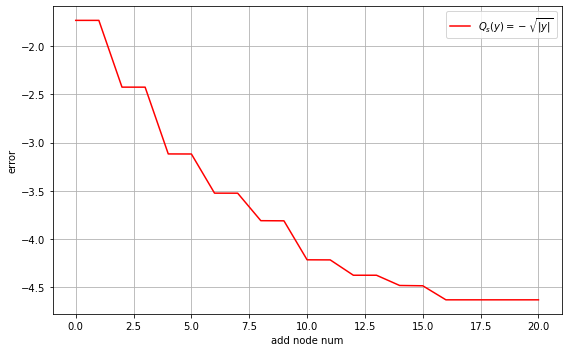

In [5]:
plt.figure(figsize=(8, 5))
plt.plot(adds, mslist, label=r'$Q_s(y) = -\sqrt{|y|}$', color='red')

plt.xlabel('add node num')
plt.ylabel('error')
#plt.title(f"Plot for {0:.1f} add nodes")
plt.legend()
plt.grid(True)
#plt.xlim(-0.2, 0.2)  
#plt.ylim(-0.5, 0)  

plt.tight_layout()

   
   
   
y node is  [-1.0, -0.7285721054599575, -0.5, -0.28145486641602036, -0.19545287973084255, -0.12511837423354974, -0.07035189727517822, -0.03125636684335061, -0.017605534237913632, -0.007812275265522572, -0.0019444407854235053, -0.00047374453219584697, 0.0, 0.0005030450253182653, 0.0019485540212610894, 0.007829272663095563, 0.01759302941526951, 0.031262297737373955, 0.07035796461650365, 0.12507891615570035, 0.19539055521694149, 0.28131680542870496, 0.5, 0.7285406638907524, 1.0]
y node length 25
ms is  0.006308636743360352


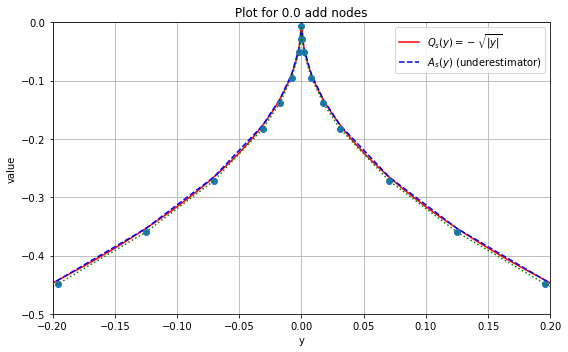

In [7]:
# y and z = |y|
y_vals = np.linspace(-delta, delta, 1001)
z_vals = np.abs(y_vals)

# define Qs(y)
Qs_vals2 = -np.sqrt(z_vals)

# As(y)
print("   ")
print("   ")
print("   ")
print('y node is ',aaa)
print('y node length',len(aaa))
print('ms is ',-ccc)
#print("ms value is ",results[i][4])
#print("y_opt value is ",results[i][5])
#z_nodes = abs(y_nodes)
#as_nodes = np.sqrt(z_nodes)
bbb2 = np.array(bbb)
#As_vals2 = np.interp(z_vals, aaa, bbb2)
#As_shifted_vals2 = As_vals2 + ccc

# make the plot
plt.figure(figsize=(8, 5))
plt.plot(y_vals, Qs_vals2, label=r'$Q_s(y) = -\sqrt{|y|}$', color='red')
#plt.plot(y_vals, As_vals2, label=r'$A_s(y)$ (underestimator)', color='blue', linestyle='--')
plt.plot(aaa, bbb2, label=r'$A_s(y)$ (underestimator)', color='blue', linestyle='--')
#plt.plot(y_vals, As_shifted_vals2, label=r'$A_s(y) + m_s$', color='green', linestyle=':')
plt.plot(aaa, bbb2+ccc, 'o')
plt.plot(aaa, bbb2+ccc, color='green', linestyle=':')
plt.xlabel('y')
plt.ylabel('value')
#plt.title('Correct: $A_s(y) + m_s$ is a global underestimator of $Q_s(y)$')
plt.title(f"Plot for {0:.1f} add nodes")
plt.legend()
plt.grid(True)
plt.xlim(-0.2, 0.2)  
plt.ylim(-0.5, 0)  

plt.tight_layout()

In [157]:
def simple_check(y_nodes, as_nodes, ms):
    assert len(y_nodes) == len(as_nodes), "length is not the same"
    
    y_vals = np.linspace(-1, 1, 1000001)
    z_vals = np.abs(y_vals)
    Qs_vals = -np.sqrt(z_vals)
    as_list = np.interp(y_vals, y_nodes, as_nodes)

    selected_points = []
    


    for y, as_val in zip(y_vals, as_list):
        if (v_1(y) - as_val) < ms+tolerance:  
            selected_points.append((y, as_val))
    
    
    return selected_points

In [158]:
print(simple_check(aaa, bbb, ccc))

[]
